In [8]:
from datasets import load_dataset, concatenate_datasets

dataset = load_dataset("0x22almostEvil/multilingual-wikihow-qa-16k")
dataset = dataset['train']

Found cached dataset parquet (/home/kosenko/.cache/huggingface/datasets/0x22almostEvil___parquet/0x22almostEvil--multilingual-wikihow-qa-16k-7a21737063f7b4d4/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 322.37it/s]


In [3]:
dataset[0]

{'INSTRUCTION': 'How to Improve Your Memory Using Meditation',
 'RESPONSE': 'Meditation has been scientifically proven to increase focus and memory. You don\'t have to use any one meditation to help your memory. Using any meditation, such as mindfulness meditation, teaches you to focus your mind. When you\'re able to focus better, you\'re also better able to solidify concepts in your short-term memory. Therefore, practicing meditation can help you to develop your short-term memory.\n1. **Start today.** You may be surprised that you don\'t need to practice meditation for that long to start seeing the effects. One scientific study examined how a group of students responded to meditation. With just two weeks of meditation practice (10 minutes a day, plus 4 45-minute classes a week), the students significantly improved their GRE scores (a standardized test given to students trying to get into graduate school).\nIn fact, some studies show as little as four days of meditation can improve you

In [9]:
import json
dataset = dataset.filter(lambda x: json.loads(x['METADATA'])['language'] == 'ru')

Loading cached processed dataset at /home/kosenko/.cache/huggingface/datasets/0x22almostEvil___parquet/0x22almostEvil--multilingual-wikihow-qa-16k-7a21737063f7b4d4/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-a09c6ee6900c5b72.arrow


In [10]:
dataset

Dataset({
    features: ['INSTRUCTION', 'RESPONSE', 'SOURCE', 'METADATA'],
    num_rows: 2058
})

In [12]:
# dataset.push_to_hub("dim/wikihow_en")
dataset.push_to_hub("dim/wikihow_ru")

Pushing dataset shards to the dataset hub: 100%|██████████| 1/1 [00:03<00:00,  3.82s/it]


In [11]:
dataset[0]

{'INSTRUCTION': 'Как оставлять комментарии от имени своей страницы на Facebook',
 'RESPONSE': 'В этой статье мы расскажем вам, как на Facebook оставлять комментарии на странице бренда, сервиса, компании или публичного человека от имени своей страницы (страницы, которой вы управляете).\n1. **Перейдите по адресу https://www.facebook.com в веб-браузере.** Добавлять комментарии от имени своей страницы можно только с помощью компьютерного веб-браузера. \nЕсли вы еще не авторизовались, в верхнем правом углу введите имя пользователя и пароль, а затем нажмите «Войти».\n2. **Перейдите на страницу, на которой хотите оставить комментарий.** Добавить комментарий от имени страницы можно на любой странице, включая вашу собственную. \n\nЕсли нужно, найдите страницу с помощью строки поиска вверху экрана. Чтобы открыть свою страницу, щелкните по ее имени в поле «Ваши страницы» в верхнем правом углу.\nОставлять комментарии от имени страницы в своем профиле не получится.\n3. **Найдите публикацию, которую

In [13]:
len(dataset)

2058

In [ ]:
for item in dataset:
    print(item['INSTRUCTION'])
    print(item['RESPONSE'])
    print("="*100)
    print("="*100)
    print("="*100)

### show distribution


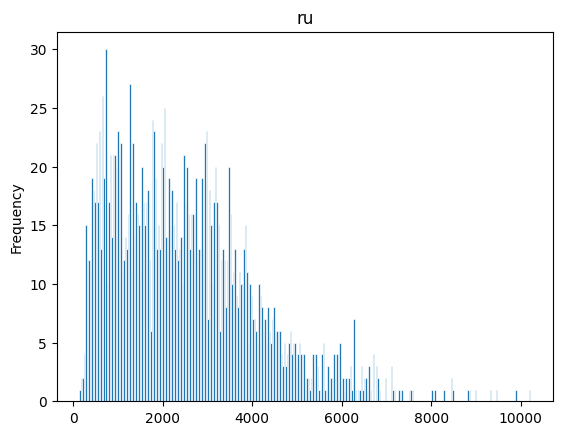

In [13]:
from transformers import AutoTokenizer
from verbalist.datasets.utils import visualize_hist

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")
# dataset = load_dataset(dataset_name)
# dataset = dataset["train"]
lengths = []

for item in dataset:
    # print(item['INSTRUCTION'])
    # print(item['RESPONSE'])
    text = item['INSTRUCTION'] + item['RESPONSE'] 
    length = len(tokenizer(text)["input_ids"])
    lengths.append(length)
    # print(all_conv)
visualize_hist(lengths, 'ru')

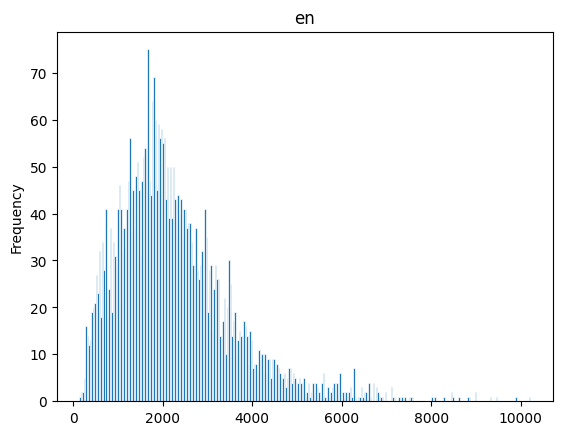

In [17]:
for item in dataset:
    # print(item['INSTRUCTION'])
    # print(item['RESPONSE'])
    text = item['INSTRUCTION'] + item['RESPONSE'] 
    length = len(tokenizer(text)["input_ids"])
    lengths.append(length)
    # print(all_conv)
visualize_hist(lengths, 'en')

In [1]:
from datasets import load_dataset
dataset = load_dataset("dim/wikihow_en")
dataset['train'][0]

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 262.39it/s]


Dataset parquet downloaded and prepared to /home/kosenko/.cache/huggingface/datasets/dim___parquet/dim--wikihow_en-a70b68d649bfa5b6/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 676.61it/s]


{'INSTRUCTION': 'How to Improve Your Memory Using Meditation',
 'RESPONSE': 'Meditation has been scientifically proven to increase focus and memory. You don\'t have to use any one meditation to help your memory. Using any meditation, such as mindfulness meditation, teaches you to focus your mind. When you\'re able to focus better, you\'re also better able to solidify concepts in your short-term memory. Therefore, practicing meditation can help you to develop your short-term memory.\n1. **Start today.** You may be surprised that you don\'t need to practice meditation for that long to start seeing the effects. One scientific study examined how a group of students responded to meditation. With just two weeks of meditation practice (10 minutes a day, plus 4 45-minute classes a week), the students significantly improved their GRE scores (a standardized test given to students trying to get into graduate school).\nIn fact, some studies show as little as four days of meditation can improve you

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['INSTRUCTION', 'RESPONSE', 'SOURCE', 'METADATA'],
        num_rows: 1995
    })
})